In [5]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

let's import the dataset

In [2]:
# Load ABT from Module 3
df = pd.read_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\\ML ORIGINAL\\PROJECT 2\\Project 2 Workbook Bundle\\project_files\\MyData\\analytical_base_table.csv')
print(df.shape)

(1863, 40)


In [3]:
# Create separate object for target variable
y = df.tx_price

# Create separate object for input features
X = df.drop('tx_price', axis=1)

In [6]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1234)

In [9]:
print( '{} observations in the training set.'.format( len(X_train) ) )
print( '{} observations in the test set.'.format( len(X_test) ) )

1490 observations in the training set.
373 observations in the test set.


In [31]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1490 373 1490 373


### Creating pipelines dictionary

In [12]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123))
}

# Add a pipeline for Elastic-Net
pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state=123))

# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(),
                                RandomForestRegressor(random_state=123))

# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(),
                                GradientBoostingRegressor(random_state=123))

In [13]:
print( pipelines['ridge'] )

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='auto', tol=0.001))])


In [15]:
print( type( pipelines['ridge'] ) )

<class 'sklearn.pipeline.Pipeline'>


###### let's check that all of the model pipelines are of the correct type. For each item in your pipelines dictionary, display its key and the class of its value.

In [16]:
# Check that we have all 5 model families, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [17]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [11]:
print( enet_hyperparameters['elasticnet__l1_ratio'] )

[0.1, 0.3, 0.5, 0.7, 0.9]


In [18]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

### To check that hyperparameters is set up correctly:

In [19]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


###### Creating a dictionary of models named fitted_models to store models that have been tuned using cross-validation.

In [20]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


lasso has been fitted.


C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


ridge has been fitted.


C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


enet has been fitted.


C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf has been fitted.


C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb has been fitted.


In [21]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


###### run this code to check that the models have been fitted correctly:

In [22]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

###### display the cross-validated training performance for each model in fitted_models .

In [23]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.3086275085937654
ridge 0.3166111585985649
enet 0.34285741362416094
rf 0.4817972498620999
gb 0.48712359268287203


###### print the performance of each model in fitted_models on the test set.

In [24]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.40888624716724375
MAE: 85035.54246538793

ridge
--------
R^2: 0.4093396476329718
MAE: 84978.03564808935

enet
--------
R^2: 0.40385733618809405
MAE: 86529.00681966158

rf
--------
R^2: 0.5722413208846286
MAE: 67948.98859249329

gb
--------
R^2: 0.5410951822821564
MAE: 70601.60664940192



C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

###### Finally, plot the performance of the winning model on the test set.

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


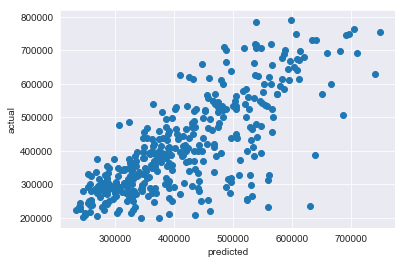

In [25]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

### Saving Your Model

In [26]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

In [27]:
type(fitted_models['rf'].best_estimator_)

sklearn.pipeline.Pipeline

In [28]:
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])

In [30]:
import pickle

with open('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\\ML ORIGINAL\\PROJECT 2\\Project 2 Workbook Bundle\\project_files\\MyData\\final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)